In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize



In [2]:
clinic = pd.read_csv('mtsamples.csv',index_col=0)
clinic.head(5)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [3]:
def get_sentence(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences = sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word]=1
    word_count = len(vocab.keys())
    return sent_count, word_count

In [4]:
clinic = clinic[clinic['transcription'].notna()]
sent_count, word_count = get_sentence(clinic['transcription'].tolist())
print('Number of sentences in transcription column: '+ str(sent_count))
print("Number of unique words in transcriptions coumn: "+ str(word_count))
                                      
data_cat = clinic.groupby(clinic['medical_specialty'])
i=1
print('############ Original Categories ############')                                      
for cateName, data_cate in data_cat:
    print('Cat:' +str(i)+ ' ' + cateName + ' : ' + str(len(data_cate)))
    i= i+1
print('################')
                                      

Number of sentences in transcription column: 140208
Number of unique words in transcriptions coumn: 35805
############ Original Categories ############
Cat:1  Allergy / Immunology : 7
Cat:2  Autopsy : 8
Cat:3  Bariatrics : 18
Cat:4  Cardiovascular / Pulmonary : 371
Cat:5  Chiropractic : 14
Cat:6  Consult - History and Phy. : 516
Cat:7  Cosmetic / Plastic Surgery : 27
Cat:8  Dentistry : 27
Cat:9  Dermatology : 29
Cat:10  Diets and Nutritions : 10
Cat:11  Discharge Summary : 108
Cat:12  ENT - Otolaryngology : 96
Cat:13  Emergency Room Reports : 75
Cat:14  Endocrinology : 19
Cat:15  Gastroenterology : 224
Cat:16  General Medicine : 259
Cat:17  Hematology - Oncology : 90
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 16
Cat:20  Lab Medicine - Pathology : 8
Cat:21  Letters : 23
Cat:22  Nephrology : 81
Cat:23  Neurology : 223
Cat:24  Neurosurgery : 94
Cat:25  Obstetrics / Gynecology : 155
Cat:26  Office Notes : 50
Cat:27  Ophthalmology : 83
Cat:28  Orthopedic : 355
Ca

Since some categories have less than 50

In [5]:
filtered_data_cate = data_cat.filter(lambda x:x.shape[0]>100)
final_data_cate = filtered_data_cate.groupby(filtered_data_cate['medical_specialty'])
i=1
print('========== Total number of Reduced Categories===============')
for cateName, data_cate in final_data_cate:
    print('Category:' +str(i)+ ' ' + cateName + ' : ' + str(len(data_cate)))
    i= i+1
print('===============')

========== Total number of Reduced Categories===============
Category:1  Cardiovascular / Pulmonary : 371
Category:2  Consult - History and Phy. : 516
Category:3  Discharge Summary : 108
Category:4  Gastroenterology : 224
Category:5  General Medicine : 259
Category:6  Neurology : 223
Category:7  Obstetrics / Gynecology : 155
Category:8  Orthopedic : 355
Category:9  Radiology : 273
Category:10  SOAP / Chart / Progress Notes : 166
Category:11  Surgery : 1088
Category:12  Urology : 156


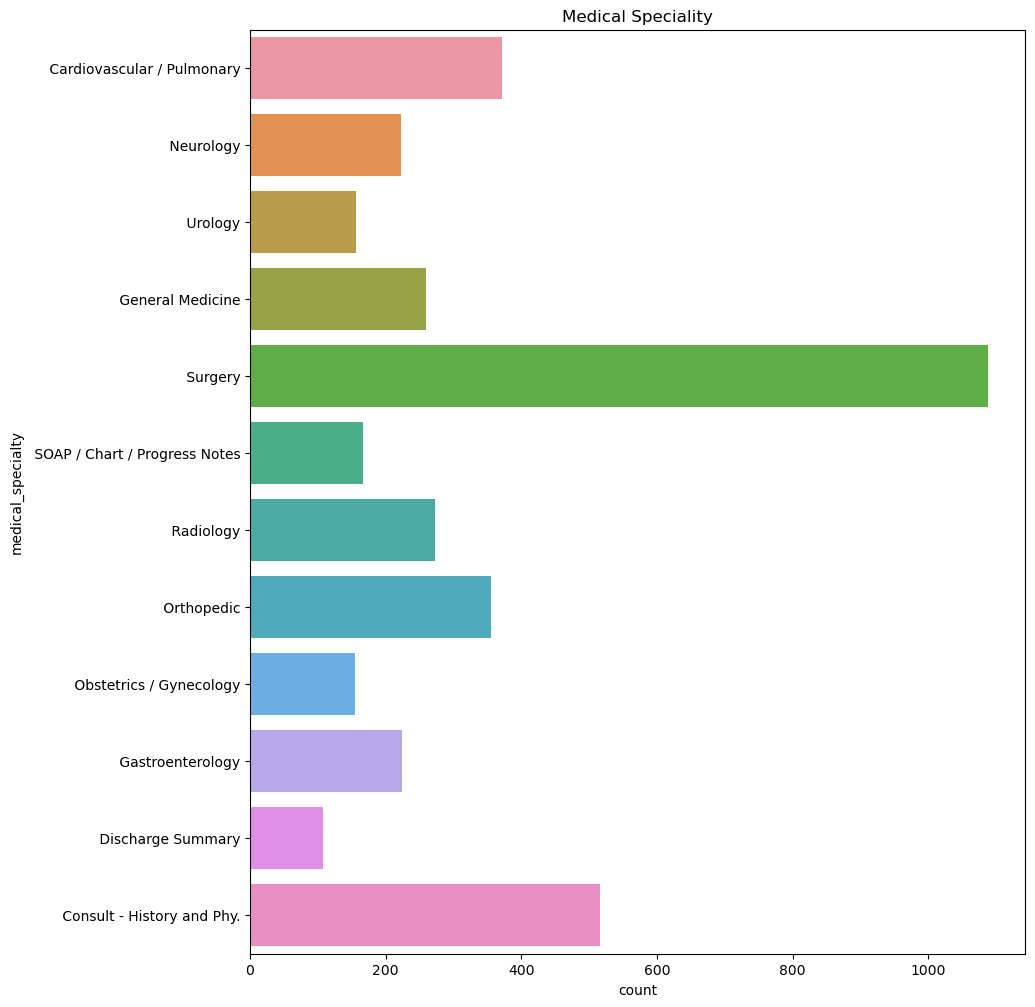

In [6]:
plt.figure(figsize =(10,12))
sns.countplot(y='medical_specialty', data = filtered_data_cate)
plt.title('Medical Speciality')
plt.show()

We are more interested in transcription and medical_speciality

In [7]:
data = filtered_data_cate[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape


(3894, 2)

In [8]:
# for better understanding let's check the content on the transcription columns by using iloc
print('Transcription 1: '+ data['transcription'].iloc[10] +'\n')
print('Transcription 2: ' + data['transcription'].iloc[108] +'\n')
print('Transcription 3: ' + data['transcription'].iloc[800] +'\n')

Transcription 1: DESCRIPTION:,  The patient was placed in the supine position and was prepped and draped in the usual manner.  The left vas was grasped in between the fingers.  The skin and vas were anesthetized with local anesthesia.  The vas was grasped with an Allis clamp.  Skin was incised and the vas deferens was regrasped with another Allis clamp.  The sheath was incised with a scalpel and elevated using the iris scissors and clamps were used to ligate the vas deferens.  The portion in between the clamps was excised and the ends of the vas were clamped using hemoclips, two in the testicular side and one on the proximal side.  The incision was then inspected for hemostasis and closed with 3-0 chromic catgut interrupted fashion.,A similar procedure was carried out on the right side.  Dry sterile dressings were applied and the patient put on a scrotal supporter.  The procedure was then terminated.

Transcription 2: CHIEF COMPLAINT:,  Foul-smelling urine and stomach pain after meals.

### Data Preprocessing

In [9]:
from nltk.stem import WordNetLemmatizer

In [10]:
data['transcription'] = data['transcription'].fillna('').apply(str)

In [11]:
def clean_text(text ):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()])
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences = sent_tokenize(text)
    initial_sentence = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    for sentence in initial_sentence:
        words = word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

In [12]:
data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)

In [13]:
print('Transcription 1: ' + data['transcription'].iloc[10] +'\n')
print('Transcription 2:' + data['transcription'].iloc[108] +'\n')
print('Transcription 3:' + data['transcription'].iloc[800] +'\n')

Transcription 1: description   the patient wa placed in the supine position and wa prepped and draped in the usual manner  dry sterile dressing were applied and the patient put on a scrotal supporter 

Transcription 2:chief complaint   foulsmelling urine and stomach pain after meals  history of present illness   stomach pain with most meal x one and a half year and urinary symptom for same amount of time  also referred her for a barium swallow series to rule out a stricture 

Transcription 3:procedures performed    at this point  the procedure wa felt to be complete 



In [14]:
filtered_data= clinic[['transcription', 'medical_specialty']]
filtered_data.loc[:, 'medical_specialty'] = filtered_data['medical_specialty'].apply(lambda x:str.strip(x))
mask = (filtered_data['medical_specialty'] == 'SOAP / Chart / Progress Notes')| \
(filtered_data['medical_specialty'] == 'Office Note') |\
(filtered_data['medical_specialty'] == 'Consult - History and Phy.') |\
(filtered_data['medical_specialty'] == 'Emergency Room Reports') |\
(filtered_data['medical_specialty'] == 'Discharge Summary') |\
(filtered_data['medical_specialty'] == 'Letters') 


filtered_data = filtered_data[~mask]
data_categories = filtered_data.groupby(filtered_data['medical_specialty'])
filtered_data_categories = data_categories.filter(lambda x:x.shape[0]>100)
filtered_data_categories['medical_specialty'].value_counts()


C:\Users\User\Downloads\python-3.8.0.exe\ipykernel_11952\3906044004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'medical_specialty'] = filtered_data['medical_specialty'].apply(lambda x:str.strip(x))


Surgery                       1088
Cardiovascular / Pulmonary     371
Orthopedic                     355
Radiology                      273
General Medicine               259
Gastroenterology               224
Neurology                      223
Urology                        156
Obstetrics / Gynecology        155
Name: medical_specialty, dtype: int64

In [15]:
# Reshuffling the data to negate artificial data pattern

data = filtered_data_categories.sample(frac=1.0)

In [16]:
data.isnull().any()

transcription        False
medical_specialty    False
dtype: bool

In [17]:
df = data.dropna(subset=['transcription'])

In [18]:
df

,transcription,medical_specialty
2523,"PREOPERATIVE DIAGNOSES:, Multiparity requeste...",Obstetrics / Gynecology
2158,"PREOPERATIVE DIAGNOSIS:, Medial meniscal tear...",Orthopedic
1737,Grade II: Atherosclerotic plaques are seen wh...,Radiology
49,"DIAGNOSIS: , Pubic cellulitis.,HISTORY OF PRES...",Urology
4831,"ADMITTING DIAGNOSES:,1. Respiratory distress....",Cardiovascular / Pulmonary
...,...,...
2209,"PREOPERATIVE DIAGNOSIS: , Painful ingrown toen...",Orthopedic
3383,"REASON FOR CONSULTATION:, This is a 66-year-o...",General Medicine
2580,"PREOPERATIVE DIAGNOSIS:, Ovarian cyst, persis...",Obstetrics / Gynecology
728,"PROCEDURE PERFORMED,1. Placement of a subclav...",Surgery


Handling Missing Data

Let's extract medical entities

In [19]:
import spacy
import en_ner_bionlp13cg_md
sci_nlp = en_ner_bionlp13cg_md.load()

In [20]:
import spacy
import en_ner_bionlp13cg_md
sci_nlp = en_ner_bionlp13cg_md.load()
def medical_entities( text):
    entities = []
    doc = sci_nlp(text)
    for ent in doc.ents:
        entities.append(ent.text)
    return ' '.join(entities)
df['transcription'] = df['transcription'].astype(str)
df['transcription'] = df['transcription'].apply(medical_entities)
df.head()

,transcription,medical_specialty
2523,upper abdominal skin upper abdominal Postpartu...,Obstetrics / Gynecology
2158,Medial meniscal Medial meniscal Lateral menisc...,Orthopedic
1737,"plaques obstruction.,Grade III plaques vessel ...",Radiology
49,penile patient 16-month-old patient patient ad...,Urology
4831,Respiratory airways Respiratory airways patien...,Cardiovascular / Pulmonary


### Machine Learning
+ Naive Bayes
+ LogisticsRegression
+ KNN
+ DecisionTree

In [21]:
# Load ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# as you might have already knonw most ML models doesnt understand text they do understand numbers, we have to vectorizer (We need to convert the text in to numbers)

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

# Split Our Dataset
# we can use sklearn to test split 

from sklearn.model_selection import train_test_split

### Build Features From Our Text


In [22]:
Xfeatures = df['transcription']
ylabels = df['medical_specialty']

In [23]:
Xfeatures

2523    upper abdominal skin upper abdominal Postpartu...
2158    Medial meniscal Medial meniscal Lateral menisc...
1737    plaques obstruction.,Grade III plaques vessel ...
49      penile patient 16-month-old patient patient ad...
4831    Respiratory airways Respiratory airways patien...
                              ...                        
2209    toenail nail patient intravenous morphine Vers...
3383    patient patient patient alcohol wine patient p...
2580    Ovarian cyst Ovarian NAME patient abdomen abdo...
728     patient patient subclavian vein venous blood H...
409     medial temporal arteriovenous medial temporal ...
Name: transcription, Length: 3104, dtype: object

In [24]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [25]:
# Get  Features By Name 
cv.get_feature_names()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '000units',
 '02',
 '03',
 '0330',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0920',
 '0g',
 '10',
 '100',
 '1000',
 '100000',
 '1000mcg',
 '10180',
 '102',
 '107',
 '108',
 '11',
 '111',
 '115',
 '117',
 '12',
 '1200',
 '121',
 '122',
 '123',
 '125',
 '128',
 '129',
 '12u',
 '13',
 '130',
 '131',
 '132',
 '134',
 '136',
 '139',
 '14',
 '140',
 '144',
 '15',
 '150',
 '1500',
 '152',
 '154k',
 '158',
 '16',
 '160',
 '160l',
 '162',
 '165',
 '17',
 '176',
 '177',
 '18',
 '180',
 '184',
 '1870',
 '189',
 '18items',
 '19',
 '190',
 '195',
 '198',
 '1995',
 '1g',
 '1gm',
 '1mg',
 '20',
 '200',
 '200000',
 '2003',
 '2005',
 '2007',
 '2008',
 '201mcg',
 '204',
 '20l',
 '20mg',
 '21',
 '210',
 '21470',
 '22',
 '220',
 '22554',
 '22585',
 '226',
 '22845',
 '22846',
 '22851',
 '23',
 '230',
 '234k',
 '23rd',
 '24',
 '240',
 '246',
 '25',
 '250',
 '25605',
 '26',
 '26055',
 '27',
 '27759',
 '278',
 '27th',
 '27y',
 '28',
 '280k',
 '28192',
 '284',
 '29',
 '295',
 '2960',
 '2980',
 '2a',

In [26]:
# To Dense Array (NUMPY)
X.toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# Split Dataset
X_train, X_test, y_train ,y_test = train_test_split(X, ylabels,test_size=0.3,random_state=42)

### Let's Build the Model

In [28]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [29]:
# Check for Accuracy
# this is method 1
nv_model.score(X_test,y_test)

0.48819742489270385

In [30]:
# Predictions
y_nv_pred = nv_model.predict(X_test)
y_nv_pred

array(['General Medicine', 'Neurology', 'Orthopedic', 'Surgery',
       'Gastroenterology', 'General Medicine', 'Orthopedic',
       'Cardiovascular / Pulmonary', 'Orthopedic',
       'Cardiovascular / Pulmonary', 'Gastroenterology', 'Urology',
       'Gastroenterology', 'General Medicine', 'Urology',
       'Obstetrics / Gynecology', 'Gastroenterology', 'General Medicine',
       'Cardiovascular / Pulmonary', 'Urology', 'General Medicine',
       'Surgery', 'Urology', 'Surgery', 'Neurology', 'Surgery',
       'Cardiovascular / Pulmonary', 'Orthopedic',
       'Cardiovascular / Pulmonary', 'Gastroenterology',
       'Obstetrics / Gynecology', 'Orthopedic', 'Orthopedic',
       'Obstetrics / Gynecology', 'Surgery', 'Surgery',
       'Obstetrics / Gynecology', 'Orthopedic', 'Obstetrics / Gynecology',
       'Orthopedic', 'Cardiovascular / Pulmonary', 'Gastroenterology',
       'Neurology', 'General Medicine', 'Gastroenterology',
       'Gastroenterology', 'Cardiovascular / Pulmonary', 'S

### Make A Single  Prediction
+ Vectorized our Text
+ Applied our model

In [31]:
sample_text = ['Brain tumor left Brain tumor left lobe brain patient supine head scalp skeletal skull scalp bone bacitracin dura Stealth cystic cortex trigone ventricle head through tumor surface Stealth yellowish necrotic tissue glioblastoma multiforme tumor vascular tumor tumors ventricle tumor cavity dura bone Lorenz titanium muscle fascia galea Skin skin blood brain tumor tumor brain']
vect = cv.transform(sample_text).toarray()

In [32]:
# Make Prediction
nv_model.predict(vect)

array(['Neurology'], dtype='<U26')

In [33]:
#Check for the Prediction Probability(Percentage)Confidence Score. Just saying why do we have 'Cardiovascular / Pulmonary', 'Gastroenterology', 'General Medicine', 'Neurology', 'Obstetrics / Gynecology','Orthopedic', 'Radiology', 'Surgery', 'Urology'
nv_model.predict_proba(vect) # the result is complicated right? Let's make it more understandable

array([[1.42329502e-29, 4.29691604e-34, 4.07607269e-42, 9.99998496e-01,
        9.50783251e-36, 1.36482406e-29, 9.24862487e-24, 1.50430239e-06,
        5.01740033e-29]])

In [34]:
# Get all the class for our model
nv_model.classes_

array(['Cardiovascular / Pulmonary', 'Gastroenterology',
       'General Medicine', 'Neurology', 'Obstetrics / Gynecology',
       'Orthopedic', 'Radiology', 'Surgery', 'Urology'], dtype='<U26')

In [35]:
np.max(nv_model.predict_proba(vect)) # it's 99.9% certain that it's 'Neurology'

0.9999984956976337

In [36]:
# Lets' create a function for better understanding 
def predict_medical_specialty(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_prob = model.predict_proba(myvect)
    pred_perc = dict(zip(model.classes_,pred_prob[0]))
    print('Prediction:{}, Prediction Score: {}'.format(prediction[0:3],np.max(pred_prob *100)))
    return pred_perc

In [37]:
predict_medical_specialty(sample_text,nv_model)

Prediction:['Neurology'], Prediction Score: 99.99984956976337


{'Cardiovascular / Pulmonary': 1.4232950163964964e-29,
 'Gastroenterology': 4.296916041464048e-34,
 'General Medicine': 4.076072687302894e-42,
 'Neurology': 0.9999984956976337,
 'Obstetrics / Gynecology': 9.507832505329138e-36,
 'Orthopedic': 1.3648240622925455e-29,
 'Radiology': 9.2486248720632e-24,
 'Surgery': 1.5043023941005895e-06,
 'Urology': 5.017400333285986e-29}

In [38]:
df

,transcription,medical_specialty
2523,upper abdominal skin upper abdominal Postpartu...,Obstetrics / Gynecology
2158,Medial meniscal Medial meniscal Lateral menisc...,Orthopedic
1737,"plaques obstruction.,Grade III plaques vessel ...",Radiology
49,penile patient 16-month-old patient patient ad...,Urology
4831,Respiratory airways Respiratory airways patien...,Cardiovascular / Pulmonary
...,...,...
2209,toenail nail patient intravenous morphine Vers...,Orthopedic
3383,patient patient patient alcohol wine patient p...,General Medicine
2580,Ovarian cyst Ovarian NAME patient abdomen abdo...,Obstetrics / Gynecology
728,patient patient subclavian vein venous blood H...,Surgery


In [39]:
df.shape

(3104, 2)

In [40]:
df['transcription'].iloc[1141]

'37y/o HA bowel OU HA HA head qid Tylenol HAs MGF family.,SHX ETOH Grad 2-3 papilledema Grade 1 papilledema PP Tongue midline SCM muscle FNF BUE. eyes PTT GS lateral meninges prepontine cisterna scar inflammed foramen Magendie. granulomatous patient V-P RBC Glucose Protein 29 GS Cultures AFB CSF samples lumbar region Serum CSF toxoplasma ACE HIV CSF cultures cervical patient amphotericin'

In [41]:
predict_medical_specialty(['Circumcision.,PRE-PROCEDURE lidocaine meatal urinary tract dorsal penile lidocaine epinephrine lidocaine dorsal Betadine glans mucosa dorsal slit was foreskin adhesions glans mucosa foreskin circumferential foreskin blood penis'],nv_model)

Prediction:['Urology'], Prediction Score: 99.98696905841155


{'Cardiovascular / Pulmonary': 1.2170400279877814e-19,
 'Gastroenterology': 2.977527171178205e-17,
 'General Medicine': 1.3839606118713285e-22,
 'Neurology': 8.76167722180435e-23,
 'Obstetrics / Gynecology': 5.003778561486765e-15,
 'Orthopedic': 3.689659130513516e-19,
 'Radiology': 2.19572035501394e-21,
 'Surgery': 0.00013030941586629255,
 'Urology': 0.9998696905841155}

In [42]:
predict_medical_specialty(['Esophageal patient upper endoscope tongue esophagus stomach stomach esophagus erythema stomach patient esophageal'],nv_model)

Prediction:['Gastroenterology'], Prediction Score: 99.80130079135233


{'Cardiovascular / Pulmonary': 6.114813269989637e-07,
 'Gastroenterology': 0.9980130079135233,
 'General Medicine': 3.2214615638965336e-09,
 'Neurology': 4.576273081394164e-12,
 'Obstetrics / Gynecology': 4.640740554995361e-13,
 'Orthopedic': 1.2964707289446816e-13,
 'Radiology': 5.210861001207974e-11,
 'Surgery': 0.0019863773263970163,
 'Urology': 1.7224240018836012e-14}

Model Evaluation

In [43]:
# Classification
print(classification_report(y_test,y_nv_pred))

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.49      0.65      0.56       105
          Gastroenterology       0.41      0.61      0.49        62
          General Medicine       0.47      0.83      0.60        75
                 Neurology       0.40      0.34      0.37        67
   Obstetrics / Gynecology       0.49      0.71      0.58        56
                Orthopedic       0.42      0.72      0.53       100
                 Radiology       0.22      0.05      0.09        91
                   Surgery       0.64      0.35      0.45       323
                   Urology       0.59      0.64      0.61        53

                  accuracy                           0.49       932
                 macro avg       0.46      0.55      0.48       932
              weighted avg       0.50      0.49      0.46       932



In [44]:
# Confusion 
confusion_matrix(y_test, y_nv_pred)

array([[ 68,   1,  17,   1,   0,   0,   3,  15,   0],
       [  1,  38,  16,   1,   0,   0,   1,   5,   0],
       [  6,   2,  62,   1,   0,   0,   0,   2,   2],
       [  1,   0,  11,  23,   0,  15,  12,   5,   0],
       [  0,   0,   9,   0,  40,   0,   0,   7,   0],
       [  0,   0,  11,   4,   0,  72,   1,  12,   0],
       [ 22,   8,   0,  23,  10,  17,   5,   6,   0],
       [ 41,  43,   1,   4,  30,  69,   0, 113,  22],
       [  0,   1,   5,   0,   1,   0,   1,  11,  34]], dtype=int64)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


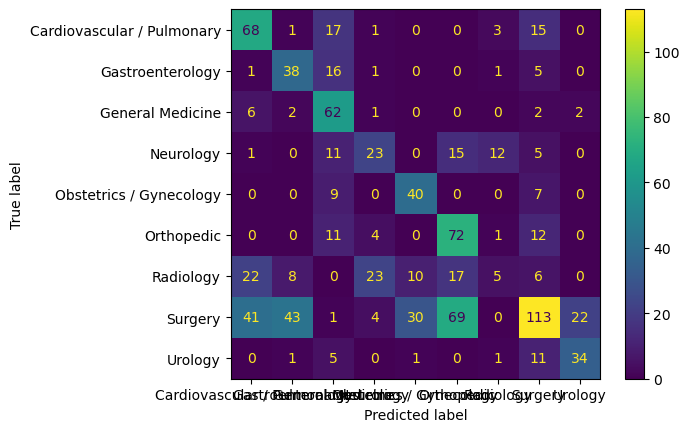

In [45]:
# Plot Confusion Matrix
plot_confusion_matrix(nv_model, X_test,y_test)

In [46]:
### Logistic Regression

In [47]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Acccuracy
lr_model.score(X_test,y_test)

0.31223175965665234

In [49]:
df['transcription'].iloc[100]

'Port-A-Cath via Metastatic renal cell gentleman patient renal cell carcinoma Philadelphia lung patient jugular PermCath that intravenous patient Lidocaine epinephrine subcutaneous pocket sheath blood saline patient'

In [50]:
# Single Prediction 
#predict_medical_specialty(sample_text,lr_model)
predict_medical_specialty(['Esophageal patient upper endoscope tongue esophagus stomach stomach esophagus erythema stomach patient esophageal'],nv_model)

Prediction:['Gastroenterology'], Prediction Score: 99.80130079135233


{'Cardiovascular / Pulmonary': 6.114813269989637e-07,
 'Gastroenterology': 0.9980130079135233,
 'General Medicine': 3.2214615638965336e-09,
 'Neurology': 4.576273081394164e-12,
 'Obstetrics / Gynecology': 4.640740554995361e-13,
 'Orthopedic': 1.2964707289446816e-13,
 'Radiology': 5.210861001207974e-11,
 'Surgery': 0.0019863773263970163,
 'Urology': 1.7224240018836012e-14}